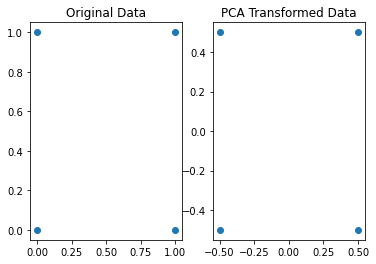

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a binary dataset
data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(data)

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Original Data')

# Plot PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Transformed Data')

plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assume a categorical dataset
cat_data = pd.DataFrame({'City': ['LA', 'NY', 'LA', 'SF'],
                         'Team': ['Lakers', 'Knicks', 'Warriors', 'Warriors']})

# One-Hot Encode the data
encoder = OneHotEncoder()
one_hot_data = encoder.fit_transform(cat_data).toarray()

# Apply PCA
pca = PCA()
pca_one_hot_data = pca.fit_transform(one_hot_data)

# Due to the high dimensionality, we can't directly visualize the transformed data.
# However, we can examine the components and explained variance:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-4.08248290e-01  5.57677536e-01 -1.49429245e-01  5.57677536e-01
  -1.49429245e-01 -4.08248290e-01]
 [ 5.00000000e-01 -1.13797860e-15 -5.00000000e-01 -8.88178420e-16
   5.00000000e-01 -5.00000000e-01]
 [ 4.08248290e-01  1.49429245e-01 -5.57677536e-01  1.49429245e-01
  -5.57677536e-01  4.08248290e-01]
 [ 4.37717427e-01  6.59021591e-01  4.37717427e-01 -3.71028909e-01
  -1.49724745e-01 -1.49724745e-01]]
[4.73205081e-01 4.00000000e-01 1.26794919e-01 9.10866935e-33]


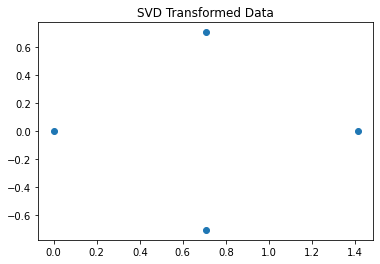

In [3]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(data)

# Plot SVD-transformed data
plt.scatter(svd_data[:, 0], svd_data[:, 1])
plt.title('SVD Transformed Data')
plt.show()


In [4]:
one_hot_data

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.]])

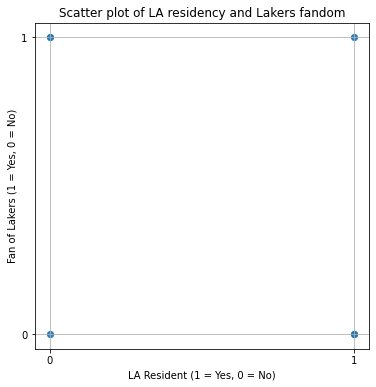

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating a DataFrame from the given data
data = {
    'la-resident': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    'fan-of-lakers': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# Creating a scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(df['la-resident'], df['fan-of-lakers'], alpha=0.5)
plt.title('Scatter plot of LA residency and Lakers fandom')
plt.xlabel('LA Resident (1 = Yes, 0 = No)')
plt.ylabel('Fan of Lakers (1 = Yes, 0 = No)')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.show()


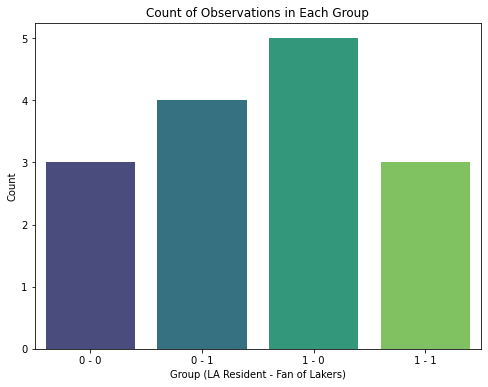

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'la-resident': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    'fan-of-lakers': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# Creating a new column for group labels
df['group'] = df['la-resident'].astype(str) + ' - ' + df['fan-of-lakers'].astype(str)

# Counting the number of observations in each group
group_counts = df['group'].value_counts().sort_index()

# Creating a grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='viridis')
plt.title('Count of Observations in Each Group')
plt.xlabel('Group (LA Resident - Fan of Lakers)')
plt.ylabel('Count')
plt.show()

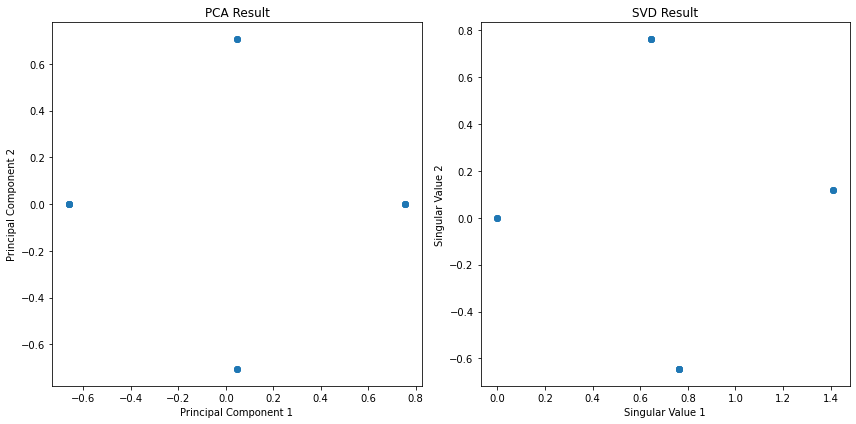

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

# Given data
data = {
    'la-resident': [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
    'fan-of-lakers': [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Apply SVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(df)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# PCA plot
axes[0].scatter(pca_result[:, 0], pca_result[:, 1])
axes[0].set_title('PCA Result')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# SVD plot
axes[1].scatter(svd_result[:, 0], svd_result[:, 1])
axes[1].set_title('SVD Result')
axes[1].set_xlabel('Singular Value 1')
axes[1].set_ylabel('Singular Value 2')

plt.tight_layout()
plt.show()
